In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 실제 TTF 파일 경로 (예: 나눔고딕)
font_path = '/content/drive/MyDrive/NanumFontSetup_TTF_ALL/NanumGothic.ttf'

# 폰트 등록 및 적용
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

In [2]:
# CSV 파일 불러오기
df = pd.read_csv('/content/drive/MyDrive/data/2020-Mar.csv')

In [3]:
# 데이터 확인
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-03-01 00:00:00 UTC,view,10900348,2232732105912091273,appliances.kitchen.mixer,kitfort,117.63,550295099,23f5ab9e-7774-416d-900b-f2725da671aa
1,2020-03-01 00:00:01 UTC,view,14300020,2232732107967300275,apparel.underwear,casio,264.37,622070532,edf19213-f0dd-46e1-ae18-28968dbddd6e
2,2020-03-01 00:00:03 UTC,view,13200063,2232732061804790604,furniture.bedroom.bed,NaN,126.10,552832344,608087d8-6b69-21db-50a3-2b91ba015532
3,2020-03-01 00:00:03 UTC,view,100077498,2232732085846540487,construction.tools.generator,tamina,424.72,613391860,5ab6c3d5-edd7-4e15-8b0a-75b467a37fd0
4,2020-03-01 00:00:04 UTC,view,1005014,2232732093077520756,construction.tools.light,samsung,482.73,517021211,0c34308d-c455-40bb-9992-3e44920bc2b9
...,...,...,...,...,...,...,...,...,...
56341236,2020-03-31 23:59:55 UTC,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24
56341237,2020-03-31 23:59:55 UTC,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357
56341238,2020-03-31 23:59:56 UTC,view,2601488,2232732101835227701,NaN,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1
56341239,2020-03-31 23:59:56 UTC,view,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789


In [4]:
# 데이터 구조
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56341241 entries, 0 to 56341240
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.8+ GB


### 고유값 확인

In [5]:
df['event_type'].value_counts()

,count
event_type,
view,52347910
cart,2968397
purchase,1024934


In [6]:
df['category_code'].value_counts()

,count
category_code,
construction.tools.light,13526546
electronics.audio.headphone,2609345
sport.bicycle,1996291
appliances.personal.massager,1956379
appliances.kitchen.refrigerators,1762723
...,...
computers.components.sound_card,203
appliances.kitchen.steam_cooker,181
computers.components.cdrw,98


In [7]:
df['category_code'].unique().tolist()

['appliances.kitchen.mixer',
 'apparel.underwear',
 'furniture.bedroom.bed',
 'construction.tools.generator',
 'construction.tools.light',
 'appliances.environment.vacuum',
 'electronics.clocks',
 'construction.components.faucet',
 'sport.bicycle',
 'apparel.shorts',
 'apparel.shoes',
 'electronics.audio.headphone',
 'construction.tools.welding',
 'appliances.personal.massager',
 'appliances.environment.air_heater',
 'computers.peripherals.printer',
 'apparel.scarf',
 'accessories.bag',
 nan,
 'appliances.kitchen.washer',
 'kids.toys',
 'furniture.bathroom.bath',
 'appliances.kitchen.coffee_grinder',
 'electronics.audio.subwoofer',
 'electronics.video.tv',
 'kids.skates',
 'computers.components.cooler',
 'apparel.shoes.sandals',
 'sport.trainer',
 'appliances.kitchen.refrigerators',
 'electronics.camera.video',
 'kids.swing',
 'furniture.bedroom.blanket',
 'appliances.kitchen.juicer',
 'appliances.kitchen.kettle',
 'electronics.telephone',
 'auto.accessories.compressor',
 'apparel.shoe

In [8]:
df['brand'].value_counts()

,count
brand,
samsung,6794303
apple,4596669
xiaomi,3270557
huawei,1322796
lucente,839632
...,...
nvprint,1
belissima,1
hanlu,1


In [14]:
df[['event_time', 'user_session']].value_counts()

event_time               user_session                        
2020-02-24 17:23:42 UTC  05d1cc01-66f6-4124-95b3-819ff3fb583c    257
2020-02-24 17:23:43 UTC  05d1cc01-66f6-4124-95b3-819ff3fb583c    136
2020-02-10 00:29:33 UTC  caf6b653-716f-4a74-ad38-bda016d3a1e5    133
2020-03-06 07:47:18 UTC  fdf0435a-4235-45fc-93bb-8ec5bb58c02c    132
2020-02-15 09:52:35 UTC  311abfc3-afa0-4026-a95f-f76a40bf24a6    132
                                                                ... 
2020-02-19 10:12:16 UTC  24d768f1-75f9-4b08-b37d-f94952b0e415      1
                         212c5b18-28f4-4345-82b4-2b6a4ae0a6b5      1
                         1c448ae0-9605-498a-bd50-bc9abd321102      1
                         14ee68c0-ce91-46b2-b06f-deeb889f949f      1
                         6c6dbc84-d1b7-47b5-9ab1-5e6f37f230bd      1
Name: count, Length: 110576337, dtype: int64

In [15]:
df[['user_id', 'user_session']].value_counts()

,,count
user_id,user_session,
597644399,181fe9f0-8c3f-44b1-b9f2-7d76f110f998,3150
603643157,63da89b4-5612-4a2c-8021-e0a00ff320a6,2839
597644399,6625edc5-d172-42b5-933d-ec3ba7dbeed9,2715
565484478,c6ab8fad-6f14-4d24-8bc6-a2a32d520950,2505
597644399,239bc08d-f457-441c-9bbf-d20e80940a39,2200
...,...,...
635166083,648dd6f8-0710-4029-80d3-3bdb48e33a53,1
635165952,1c9f14f9-9e8d-4527-bf5c-041f50e21b40,1
635165628,6159071e-b126-4fbd-918d-fae2e5cc0970,1


### 결측치 확인

In [16]:
# 결측치 비율 계산
missing_ratio = df.isnull().mean().sort_values(ascending=False)

# 결측치 비율이 있는 컬럼만 보기 (선택사항)
missing_ratio = missing_ratio[missing_ratio > 0]

# 결과 출력
print("결측치 비율 (%):")
print((missing_ratio * 100).round(2))

결측치 비율 (%):
brand            14.97
category_code     9.73
user_session      0.00
dtype: float64


In [9]:
df.isna().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,5938692
brand,8123632
price,0
user_id,0
user_session,51


### 전처리 : 날짜 형식 변환

In [10]:
# datetime 형식으로 되어 있어야 함
df['event_time'] = pd.to_datetime(df['event_time'])

# event_date를 datetime으로 변환 (안정성 확보)
df['event_date'] = pd.to_datetime(df['event_time'].dt.date)

# 시간 컬럼 생성 (00시 단위까지만)
df['event_hour'] = df['event_time'].dt.hour

### 전처리 : null 값 처리

In [ ]:
# df['brand'] = df['brand'].fillna('unknown')
# df['price'] = df['price'].fillna(0)

### 전처리 : category_code 분할

In [11]:
# .으로 나눈 컬럼 생성 (최대 4단계까지 가정)
category_split = df['category_code'].str.split('.', expand=True)

# 새로운 컬럼 이름 지정
category_split.columns = ['category_lvl1', 'category_lvl2', 'category_lvl3', 'category_lvl4']

# 기존 df에 병합
df = pd.concat([df, category_split], axis=1)

In [12]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2020-03-01 00:00:00+00:00,view,10900348,2232732105912091273,appliances.kitchen.mixer,kitfort,117.63,550295099,23f5ab9e-7774-416d-900b-f2725da671aa,2020-03-01,0,appliances,kitchen,mixer,None
1,2020-03-01 00:00:01+00:00,view,14300020,2232732107967300275,apparel.underwear,casio,264.37,622070532,edf19213-f0dd-46e1-ae18-28968dbddd6e,2020-03-01,0,apparel,underwear,None,None
2,2020-03-01 00:00:03+00:00,view,13200063,2232732061804790604,furniture.bedroom.bed,NaN,126.10,552832344,608087d8-6b69-21db-50a3-2b91ba015532,2020-03-01,0,furniture,bedroom,bed,None
3,2020-03-01 00:00:03+00:00,view,100077498,2232732085846540487,construction.tools.generator,tamina,424.72,613391860,5ab6c3d5-edd7-4e15-8b0a-75b467a37fd0,2020-03-01,0,construction,tools,generator,None
4,2020-03-01 00:00:04+00:00,view,1005014,2232732093077520756,construction.tools.light,samsung,482.73,517021211,0c34308d-c455-40bb-9992-3e44920bc2b9,2020-03-01,0,construction,tools,light,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56341236,2020-03-31 23:59:55+00:00,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24,2020-03-31,23,construction,tools,light,None
56341237,2020-03-31 23:59:55+00:00,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-03-31,23,appliances,personal,massager,None
56341238,2020-03-31 23:59:56+00:00,view,2601488,2232732101835227701,NaN,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1,2020-03-31,23,NaN,NaN,NaN,NaN
56341239,2020-03-31 23:59:56+00:00,view,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,2020-03-31,23,appliances,personal,massager,None


### EDA

| 분석 단계     | 목적              |
| --------- | --------------- |
| 구매 간격 분석  | 재구매 주기 추정       |
| 고객 분류     | 빈번/중간/드문        |
| 제품군 주기 분석 | 빠른 vs 느린 제품군    |
| 이탈 타겟 정의  | 리마케팅 기준 설정      |
| 베스트셀러 추출  | 월별 인기상품 인사이트 확보 |

### 1. 고객별 구매 간격(재구매 주기) 분포

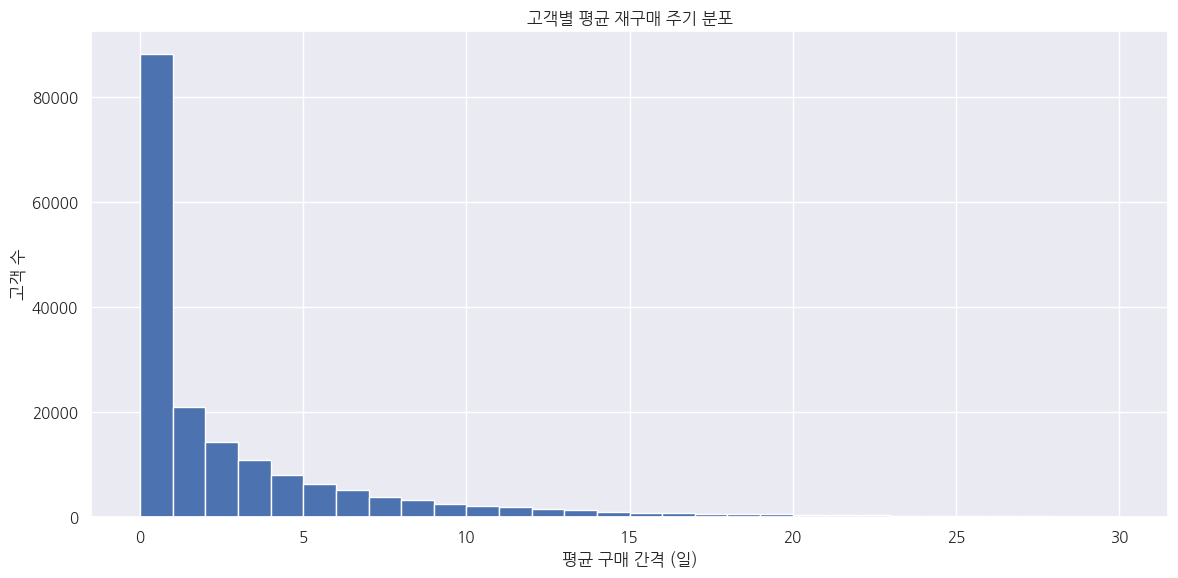

In [18]:
# 1. 구매 이벤트만 필터링
purchase_df = df[df['event_type'] == 'purchase'].copy()

# 2. 시간 형식 변환
purchase_df['event_time'] = pd.to_datetime(purchase_df['event_time'], utc=True)

# 3. user_id 기준으로 구매 시점 정렬
purchase_df = purchase_df.sort_values(['user_id', 'event_time'])

# 4. 직전 구매 시점 구하기
purchase_df['prev_time'] = purchase_df.groupby('user_id')['event_time'].shift(1)

# 5. 재구매까지 걸린 일 수 계산
purchase_df['days_between'] = (purchase_df['event_time'] - purchase_df['prev_time']).dt.days

# 6. 유효한 재구매만 추출 (첫 구매는 제외됨)
repeat_df = purchase_df.dropna(subset=['days_between'])

# 7. 고객별 평균 재구매 주기 및 재구매 횟수 집계
user_stats = repeat_df.groupby('user_id')['days_between'].agg(['mean', 'count']).rename(columns={
    'mean': 'avg_days_between', 'count': 'purchase_count'
})

# 8. 히스토그램으로 고객별 평균 재구매 주기 분포 시각화
user_stats['avg_days_between'].hist(bins=30)
plt.title('고객별 평균 재구매 주기 분포')
plt.xlabel('평균 구매 간격 (일)')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

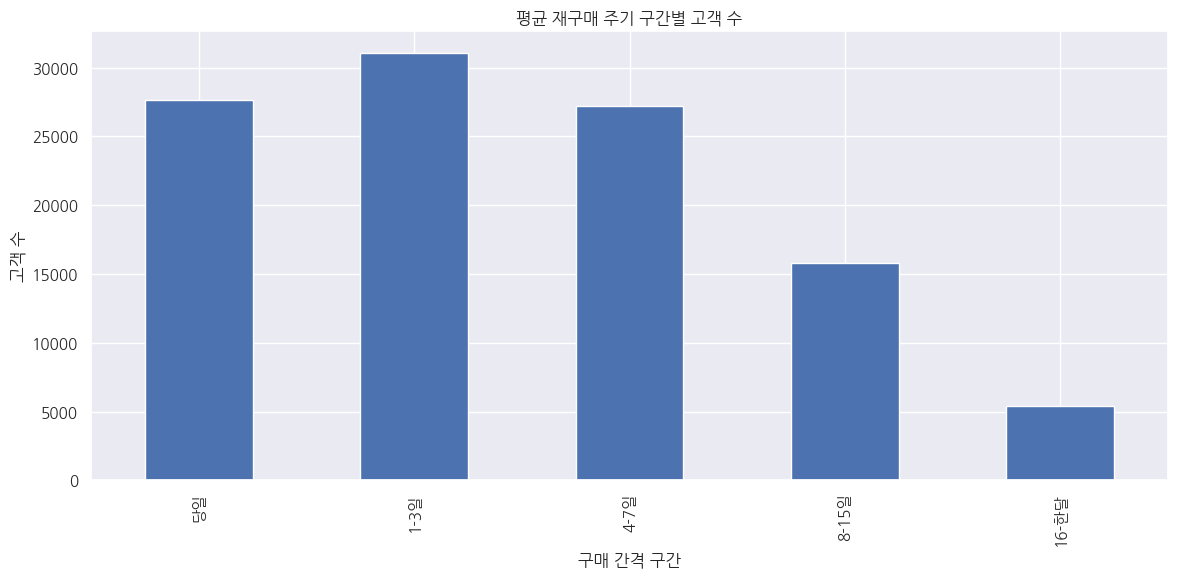

In [44]:
bins = [0, 1, 3, 7, 15, 35]
labels = ['당일', '1-3일', '4-7일', '8-15일', '16-한달']
user_stats['days_bin'] = pd.cut(user_stats['avg_days_between'], bins=bins, labels=labels)

user_stats['days_bin'].value_counts().sort_index().plot(kind='bar')
plt.title('평균 재구매 주기 구간별 고객 수')
plt.xlabel('구매 간격 구간')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

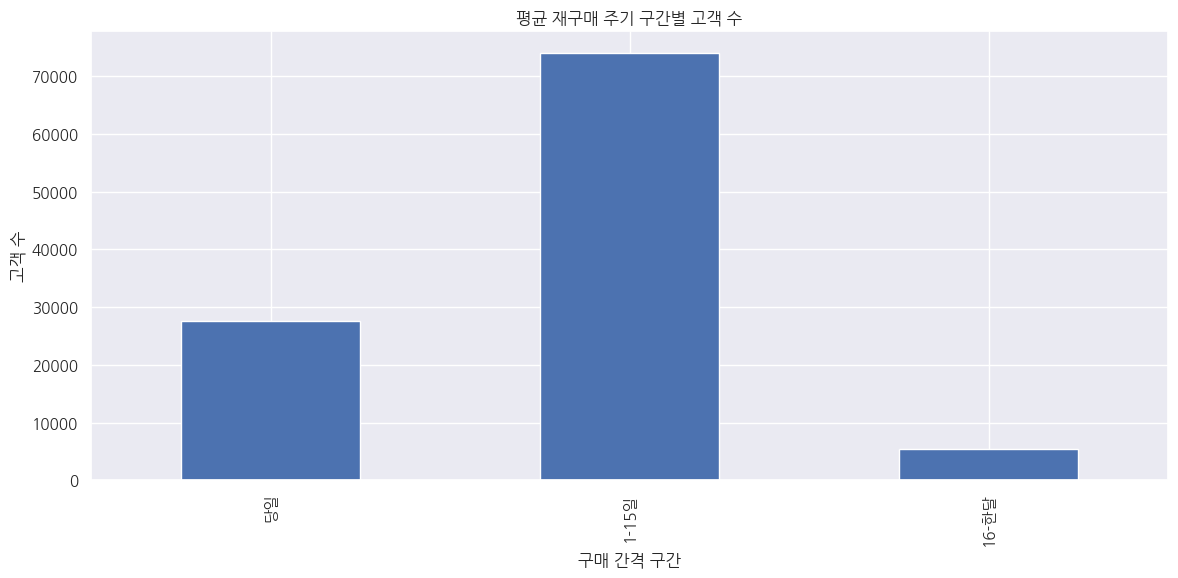

In [96]:
bins = [0, 1, 15, 35]
labels = ['당일', '1-15일', '16-한달']
user_stats['days_bin'] = pd.cut(user_stats['avg_days_between'], bins=bins, labels=labels)

user_stats['days_bin'].value_counts().sort_index().plot(kind='bar')
plt.title('평균 재구매 주기 구간별 고객 수')
plt.xlabel('구매 간격 구간')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

| 구간               | 의미        | 마케팅 활용        |
| ---------------- | --------- | ------------- |
| `당일`             | 초충성 고객    | 신상품 추천, 리뷰 유도 |
| `1-3일`, `4-7일`   | 단기 재구매 고객 | 묶음판매/추천 상품    |
| `8-15일`, `16-한달` | 중\~장기 고객  | 리마케팅, 리마인더    |

### 2. 고객군 분류 (빈번/중간/드문)

In [30]:
# 중복 구간 제거 후, 실제로 몇 구간 나뉘는지 확인
# 0일 이상 고객만 사용
filtered = user_stats[user_stats['avg_days_between'] > 0].copy()

# 실제 값만을 대상으로 quantile 계산
filtered['frequency_segment'] = pd.qcut(
    filtered['avg_days_between'],
    q=3,
    labels=['빈번', '중간', '드문']
)

# 분포 확인
filtered['frequency_segment'].value_counts()

,count
frequency_segment,
빈번,36434
드문,35640
중간,35015


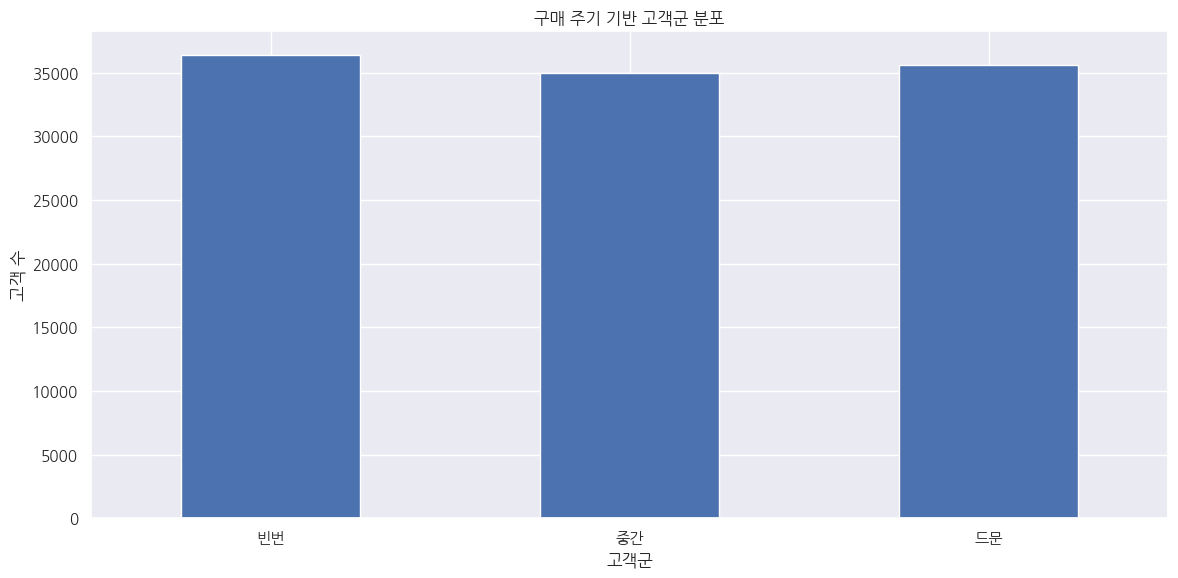

In [33]:
# 분포 데이터 생성 (이미 있다면 생략 가능)
segment_counts = filtered['frequency_segment'].value_counts().sort_index()  # 순서: 빈번-중간-드문

# 시각화
segment_counts.plot(kind='bar')
plt.title('구매 주기 기반 고객군 분포')
plt.xlabel('고객군')
plt.ylabel('고객 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 3. 카테고리별 평균 재구매 주기

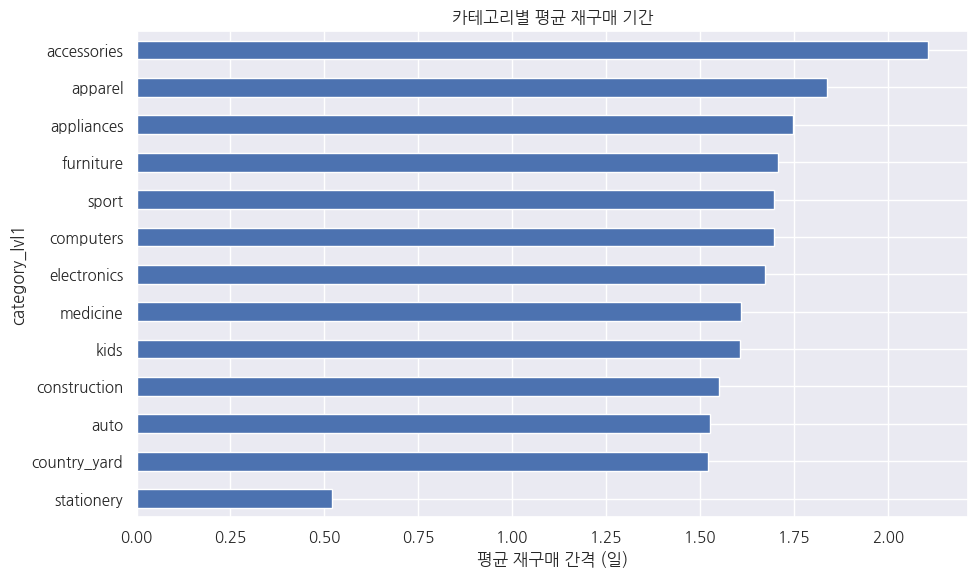

In [20]:
# --- 5. 카테고리별 평균 재구매 주기 분석 ---
# category_lvl1 기준 (필요시 lvl2~4도 가능)
purchase_df = purchase_df.sort_values(['user_id', 'category_lvl1', 'event_time'])
purchase_df['prev_time_cat'] = purchase_df.groupby(['user_id', 'category_lvl1'])['event_time'].shift(1)
purchase_df['days_between_cat'] = (purchase_df['event_time'] - purchase_df['prev_time_cat']).dt.days

category_recency = purchase_df.dropna(subset=['days_between_cat']) \
    .groupby('category_lvl1')['days_between_cat'].mean().sort_values()

# 시각화: 카테고리별 평균 재구매 주기
category_recency.plot(kind='barh', figsize=(10,6), title='카테고리별 평균 재구매 기간')
plt.xlabel('평균 재구매 간격 (일)')
plt.tight_layout()
plt.show()

### 4. 이탈 위험 고객

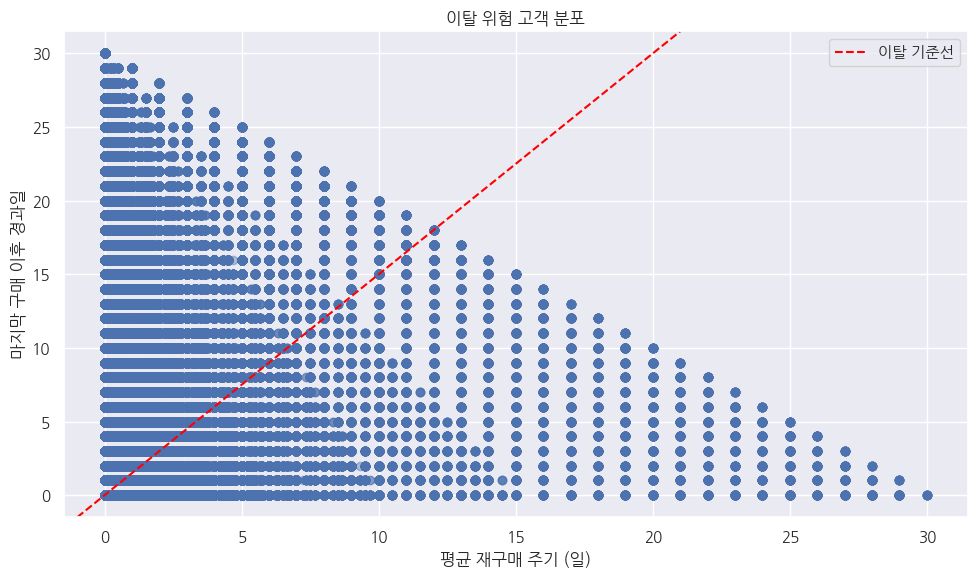

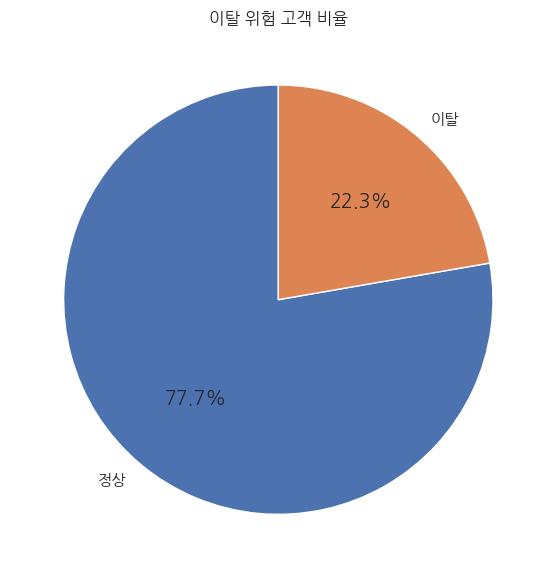

In [21]:
# --- 6. 이탈 고객 판별 (마지막 구매 이후 N일 경과) ---
latest_purchase = purchase_df.groupby('user_id')['event_time'].max().reset_index()
latest_purchase['days_since_last_purchase'] = (df['event_time'].max() - latest_purchase['event_time']).dt.days

user_stats = user_stats.merge(latest_purchase, on='user_id')
user_stats['churn_risk'] = user_stats['days_since_last_purchase'] > (user_stats['avg_days_between'] * 1.5)

# 시각화: 산점도 + 이탈 기준선
plt.figure(figsize=(10, 6))
plt.scatter(user_stats['avg_days_between'], user_stats['days_since_last_purchase'], alpha=0.4)
plt.axline((0, 0), slope=1.5, color='red', linestyle='--', label='이탈 기준선')
plt.xlabel('평균 재구매 주기 (일)')
plt.ylabel('마지막 구매 이후 경과일')
plt.title('이탈 위험 고객 분포')
plt.legend()
plt.tight_layout()
plt.show()

# 시각화: 이탈 비율 파이차트
user_stats['churn_risk'].value_counts(normalize=True).plot(
    kind='pie', labels=['정상', '이탈'], autopct='%1.1f%%', startangle=90)
plt.title('이탈 위험 고객 비율')
plt.ylabel('')
plt.tight_layout()
plt.show()

### 5. 고객군별 이탈률 비교

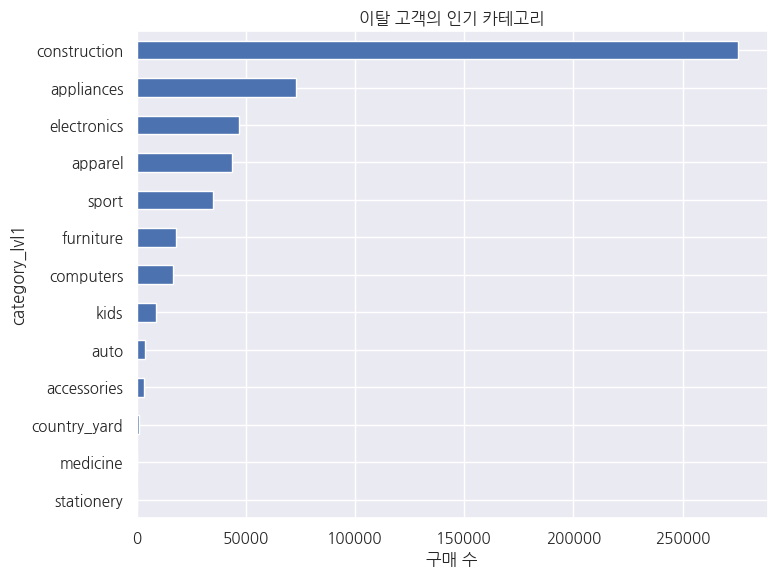

In [86]:
# 이탈 고객 목록 추출
churned_users = user_stats[user_stats['churn_risk'] == True]['user_id']

# 해당 고객들의 구매 데이터 추출
churned_purchases = purchase_df[purchase_df['user_id'].isin(churned_users)]

# 카테고리 기준 인기순 집계
category_counts = churned_purchases['category_lvl1'].value_counts().sort_values(ascending=True)

# 시각화
category_counts.plot(kind='barh', figsize=(8, 6))
plt.title('이탈 고객의 인기 카테고리')
plt.xlabel('구매 수')
plt.tight_layout()
plt.show()

### n일 이상 미구매 고객 → 리마케팅 타겟

In [56]:
# 기준일 설정 (예: 30일)
N = 30

# 마지막 구매일 계산 (이미 있다면 생략 가능)
latest_purchase = purchase_df.groupby('user_id')['event_time'].max().reset_index()
latest_purchase['days_since_last_purchase'] = (df['event_time'].max() - latest_purchase['event_time']).dt.days

# N일 이상 미구매 고객 추출
retarget_users = latest_purchase[latest_purchase['days_since_last_purchase'] >= N]

# 결과 확인
print(f"📌 {N}일 이상 미구매 고객 수: {len(retarget_users)}명")

📌 30일 이상 미구매 고객 수: 10447명


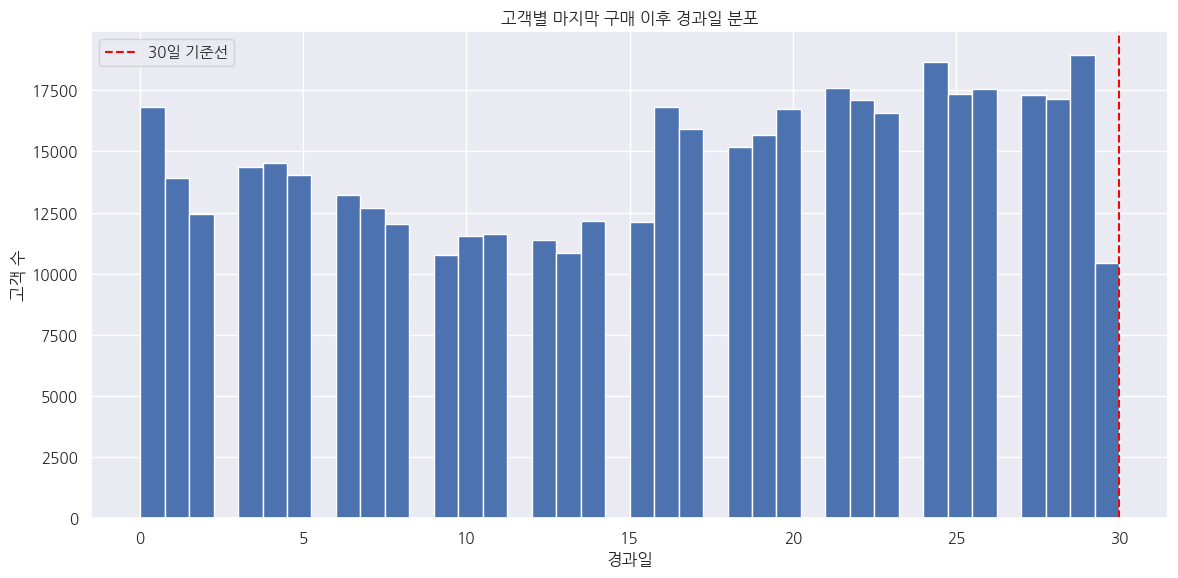

In [57]:
latest_purchase['days_since_last_purchase'].hist(bins=40)
plt.axvline(N, color='red', linestyle='--', label=f'{N}일 기준선')
plt.title('고객별 마지막 구매 이후 경과일 분포')
plt.xlabel('경과일')
plt.ylabel('고객 수')
plt.legend()
plt.tight_layout()
plt.show()

### 카테고리별로 고객군 나눠 재구매 패턴 등 분석

In [58]:
# 유저-카테고리 기준 정렬 후, 이전 구매 시점 계산
purchase_df = purchase_df.sort_values(['user_id', 'category_lvl1', 'event_time'])
purchase_df['prev_time_cat'] = purchase_df.groupby(['user_id', 'category_lvl1'])['event_time'].shift(1)
purchase_df['days_between_cat'] = (purchase_df['event_time'] - purchase_df['prev_time_cat']).dt.days

# 재구매만 추출
repeat_df_cat = purchase_df.dropna(subset=['days_between_cat'])


In [61]:
# 사용자별 카테고리 평균 재구매 주기
user_cat_stats = repeat_df_cat.groupby(['user_id', 'category_lvl1'])['days_between_cat'].mean().reset_index()
user_cat_stats.rename(columns={'days_between_cat': 'avg_days_between_cat'}, inplace=True)


In [73]:
# 카테고리별 분위수 경계값 (3분할 기준) 출력
category_bins = {}

for cat in user_cat_stats['category_lvl1'].unique():
    values = user_cat_stats[user_cat_stats['category_lvl1'] == cat]['avg_days_between_cat'].dropna()
    if values.nunique() >= 3:
        # 분위수 경계 추출
        try:
            _, bins = pd.qcut(values, q=3, retbins=True, duplicates='drop')
            category_bins[cat] = bins
        except:
            category_bins[cat] = 'qcut 실패 (분포 이상)'
    else:
        category_bins[cat] = '값 부족'

# 결과 확인 (정렬된 형태로)
import pprint
pprint.pprint(category_bins)

{'accessories': array([ 0.,  2., 29.]),
 'apparel': array([ 0.,  2., 30.]),
 'appliances': array([ 0.        ,  1.70952381, 30.        ]),
 'auto': array([ 0.,  1., 28.]),
 'computers': array([ 0.,  2., 30.]),
 'construction': array([ 0.,  2., 30.]),
 'country_yard': array([ 0.        ,  1.19393939, 24.        ]),
 'electronics': array([ 0. ,  1.5, 30. ]),
 'furniture': array([ 0.   ,  1.125, 30.   ]),
 'kids': array([ 0.  ,  1.25, 29.  ]),
 'medicine': array([ 0.,  1., 19.]),
 'sport': array([ 0.        ,  1.66666667, 29.        ]),
 'stationery': array([ 0., 12.])}


In [77]:
def assign_segment(row):
    cat = row['category_lvl1']
    val = row['avg_days_between_cat']
    bins = custom_bins_dict.get(cat)

    if bins is None or pd.isna(val):
        return '드문'  # fallback 처리

    # 라벨 수와 구간 수 맞춰 자르기
    n_bins = len(bins) - 1
    adjusted_labels = ['빈번', '중간', '드문'][:n_bins]

    return pd.cut([val], bins=bins, labels=adjusted_labels, include_lowest=True)[0]

In [79]:
# 직접 구간 기준 정의 (기존 bins 재활용)
custom_bins_dict = {
    'accessories': [0, 2, 29, float('inf')],
    'apparel': [0, 2, 30, float('inf')],
    'appliances': [0, 1.7, 30, float('inf')],
    'auto': [0, 1, 28, float('inf')],
    'computers': [0, 2, 30, float('inf')],
    'construction': [0, 2, 30, float('inf')],
    'country_yard': [0, 1.2, 24, float('inf')],
    'electronics': [0, 1.5, 30, float('inf')],
    'furniture': [0, 1.1, 30, float('inf')],
    'kids': [0, 1.2, 29, float('inf')],
    'medicine': [0, 1, 19, float('inf')],
    'sport': [0, 1.6, 29, float('inf')],
    'stationery': [0, 6, 12, float('inf')]
}

# 레이블 고정
labels = ['빈번', '중간', '드문']

# 함수 정의
def assign_segment(row):
    cat = row['category_lvl1']
    val = row['avg_days_between_cat']
    bins = custom_bins_dict.get(cat)
    if bins is None or pd.isna(val):
        return '드문'  # fallback 처리
    return pd.cut([val], bins=bins, labels=labels, include_lowest=True)[0]

# 적용
user_cat_stats['frequency_segment'] = user_cat_stats.apply(assign_segment, axis=1)

In [80]:
user_cat_stats['frequency_segment'].value_counts(dropna=False)

,count
frequency_segment,
빈번,106249
중간,48505


In [81]:
# 카테고리별 고객군 수 확인
segment_counts = user_cat_stats.groupby(['category_lvl1', 'frequency_segment']).size().unstack()
display(segment_counts)


frequency_segment,빈번,중간
category_lvl1,,
accessories,649,269
apparel,9505,3863
appliances,15983,7992
auto,672,321
computers,3239,1307
construction,54525,23955
country_yard,186,92
electronics,9893,4862
furniture,3379,1691


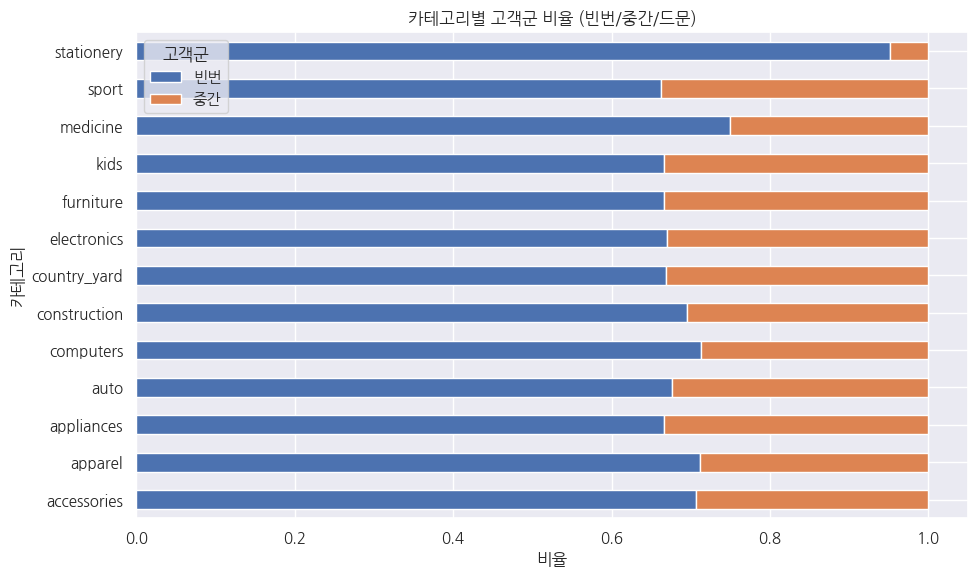

In [82]:
# 비율 시각화
segment_counts_ratio = segment_counts.div(segment_counts.sum(axis=1), axis=0)

segment_counts_ratio.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('카테고리별 고객군 비율 (빈번/중간/드문)')
plt.xlabel('비율')
plt.ylabel('카테고리')
plt.legend(title='고객군')
plt.tight_layout()
plt.show()


### 베스트셀러

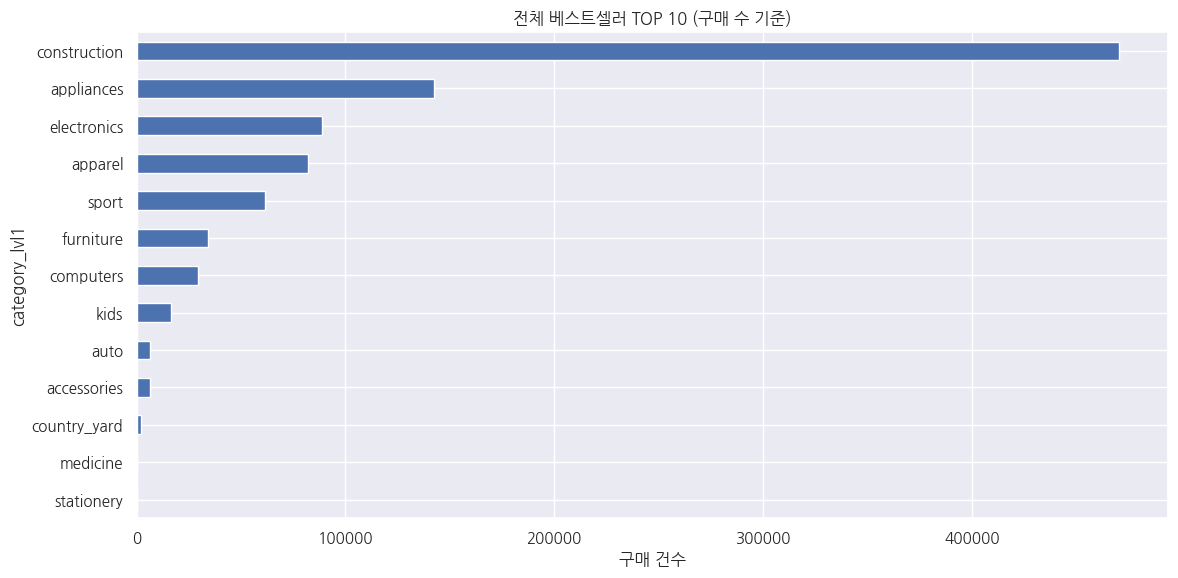

In [91]:
# 구매 이벤트만 필터링
purchase_df = df[df['event_type'] == 'purchase'].copy()

# 제품별 구매 횟수 집계
best_products = purchase_df['category_lvl1'].value_counts().sort_values(ascending=True)

# 시각화
best_products.plot(kind='barh')
plt.title('전체 베스트셀러 TOP 10 (구매 수 기준)')
plt.xlabel('구매 건수')
plt.tight_layout()
plt.show()


### 구매 시간대 분석

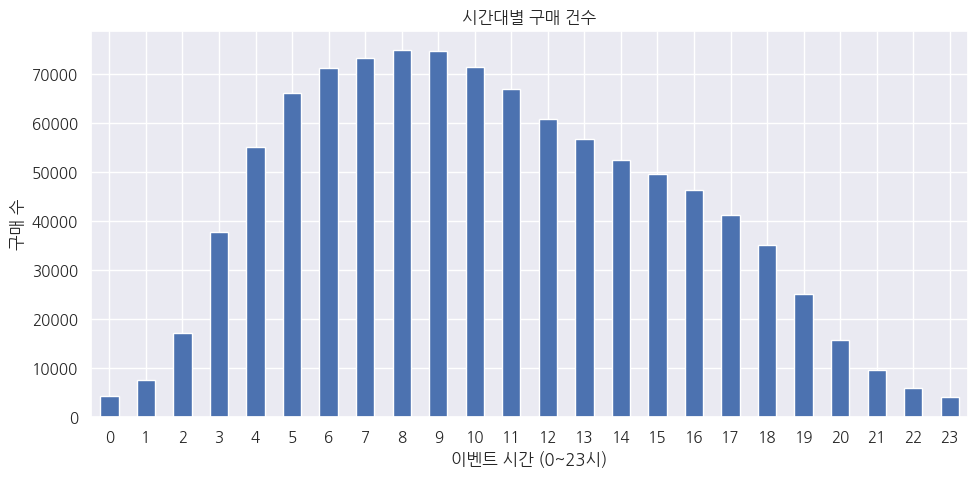

In [93]:
# 1. 구매 이벤트만 필터링
purchase_df = df[df['event_type'] == 'purchase'].copy()

# 2. 시간대별 구매 건수 집계
hourly_purchase = purchase_df['event_hour'].value_counts().sort_index()

# 3. 시각화
hourly_purchase.plot(kind='bar', figsize=(10, 5))
plt.title('시간대별 구매 건수')
plt.xlabel('이벤트 시간 (0~23시)')
plt.ylabel('구매 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
